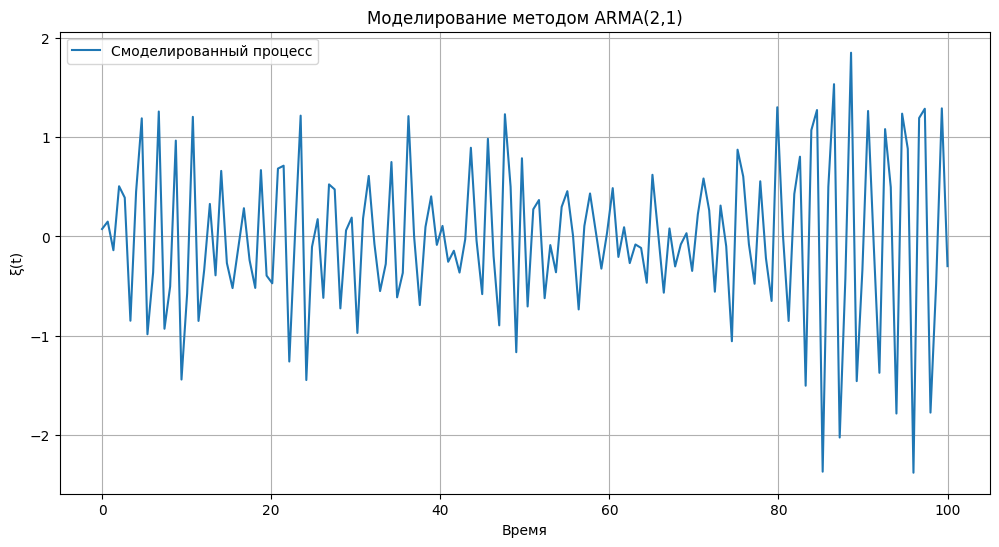

Описательные статистики:
Среднее: -0.0182
Дисперсия: 0.6191
Медиана: -0.0361
Первый квартиль (Q1): -0.4758
Третий квартиль (Q3): 0.4997
Асимметрия: -0.3391
Эксцесс: 0.3476


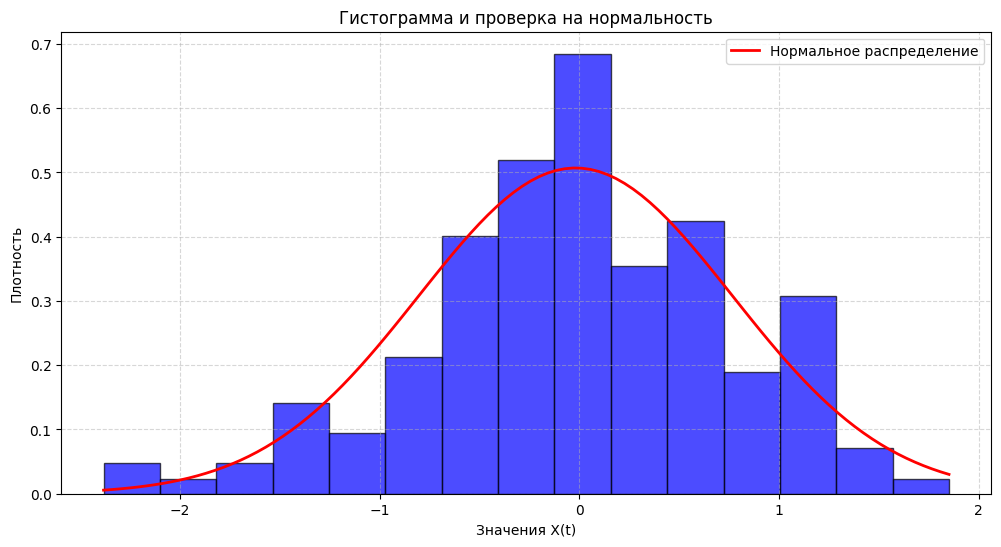

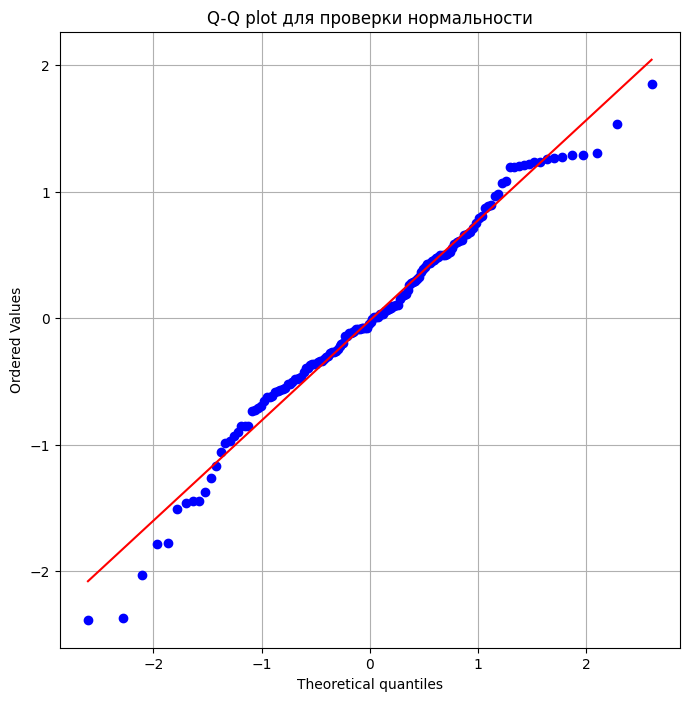

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Параметры
D = 1.0
alpha = 0.15
beta = 3.0
n = 150
T = 100.0
delta_t = T / n

gamma = alpha * delta_t
gamma_0 = beta * delta_t

alpha_0 = np.exp(-gamma) * (np.exp(-2*gamma) - 1) * np.cos(gamma_0)
alpha1 = 1 - np.exp(-4*gamma)

a0 = np.sqrt(D) * alpha
a1 = np.sqrt(D) * (alpha_0 / alpha)
b1 = 2 * np.exp(-gamma) * np.cos(gamma_0)
b2 = -np.exp(-2 * gamma)

# Генерация белого шума
np.random.seed(42)
x = np.random.normal(0, 1, n)

# Инициализация процесса
xi = np.zeros(n)
xi[0] = a0 * x[0]
xi[1] = a0 * x[1] + a1 * x[0] + b1 * xi[0]

for i in range(2, n):
    xi[i] = a0 * x[i] + a1 * x[i-1] + b1 * xi[i-1] + b2 * xi[i-2]

# График
t = np.linspace(0, T, n)
plt.figure(figsize=(12, 6))
plt.plot(t, xi, label='Смоделированный процесс')
plt.title('Моделирование методом ARMA(2,1)')
plt.xlabel('Время')
plt.ylabel('ξ(t)')
plt.grid()
plt.legend()
plt.show()

#Описательные статистики:
mu_hat = np.mean(xi)
var_hat = np.var(xi)
skew_hat = stats.skew(xi)
kurt_hat = stats.kurtosis(xi)

# Добавленные статистики
median = np.median(xi)
q1 = np.percentile(xi, 25)  # Первый квартиль (25-й процентиль)
q3 = np.percentile(xi, 75)  # Третий квартиль (75-й процентиль)

print("Описательные статистики:")
print(f"Среднее: {mu_hat:.4f}")
print(f"Дисперсия: {var_hat:.4f}")
print(f"Медиана: {median:.4f}")
print(f"Первый квартиль (Q1): {q1:.4f}")
print(f"Третий квартиль (Q3): {q3:.4f}")
print(f"Асимметрия: {skew_hat:.4f}")
print(f"Эксцесс: {kurt_hat:.4f}")

# Гистограмма с нормальным распределением
plt.figure(figsize=(12, 6))
plt.hist(xi, bins=15, density=True, alpha=0.7, color='blue', edgecolor='black')
x_norm = np.linspace(min(xi), max(xi), 100)
plt.plot(x_norm, stats.norm.pdf(x_norm, mu_hat, np.sqrt(var_hat)), 
         'r-', lw=2, label='Нормальное распределение')
plt.title('Гистограмма и проверка на нормальность')
plt.xlabel('Значения X(t)')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(8, 8))
stats.probplot(xi, dist="norm", plot=plt)
plt.title('Q-Q plot для проверки нормальности')
plt.grid(True)
plt.show()

# Проверка на нормальность (тест Шапиро-Уилка)
shapiro_test = stats.shapiro(xi)
print(f"\nТест Шапиро-Уилка: p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Не отвергаем гипотезу о нормальности (p > 0.05)")
else:
    print("Отвергаем гипотезу о нормальности (p ≤ 0.05)")

# Проверка на тренд (тест Манна-Кендалла)
from scipy.stats import kendalltau
tau, p_value = kendalltau(t, xi)
print(f"\nТест Манна-Кендалла на тренд: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Значимый тренд не обнаружен")
else:
    print("Обнаружен значимый тренд")

# Эмпирическая ковариационна функция
def empirical_covariance(x, max_lag):
    n = len(x)
    mu = np.mean(x)
    R = np.zeros(max_lag)
    for h in range(max_lag):
        R[h] = np.sum((x[h:] - mu) * (x[:n-h] - mu)) / (n - h)
    return R

max_lag = 2 * n // 3
R_emp = empirical_covariance(xi, max_lag)

# Теоретическая ковариационная функция
def theoretical_cov(h, D, alpha, beta):
    return D * np.exp(-alpha*np.abs(h)) * np.cos(beta*h)

R_theory = [theoretical_cov(h, D, alpha, beta) for h in range(max_lag)]

#Сравнение теоретической и эмпирической ковариационных функций
plt.figure(figsize=(12, 6))
plt.plot(range(max_lag), R_theory, 'b-', linewidth=2, label='Теоретическая R(h)')
plt.plot(range(max_lag), R_emp, 'r--', linewidth=1.5, label='Эмпирическая оценка')
plt.title('Сравнение теоретической и эмпирической ковариационных функций')
plt.xlabel('Лаг h')
plt.ylabel('R(h)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()